<a href="https://colab.research.google.com/github/hyeonyeongjung/2024-1-my-BDA/blob/main/inclass/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C_10%EC%A1%B0_20232505_%EC%A0%95%ED%98%84%EC%98%81_20232880_%EB%B0%95%ED%95%9C%EB%B3%84_20232882_%EC%B1%84%ED%98%9C%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

## 데이터 전처리

In [1]:
# 그래프 해상도 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [6,4]})      # 그림 크기, 기본값 [6, 4]

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
df = sns.load_dataset('titanic')

In [7]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


## 15개 컬럼으로 구성
1. survived
> - 생존 여부
> - 0이면 사망, 1이면 생존
2. pclass
> - 객실 등급
> - 1이면 1등급, 2이면 2등급, 3이면 3등급
3. sex
> - 성별
> - male이면 남자, female이면 여자
4. age
> - 나이
5. sibsp
> - 함께 탑승한 형제 및 배우자 수
6. parch
> - 함께 탑승한 자녀 및 부모 수
7. fare
> - 요금
8. embarked
> - 탑승지 이름 앞글자
> - C는 Cherbourg, Q는 Queenstown, S는 Southampton
9. class
> - 객실 등급
> - First면 1등급, Second면 2등급, Third면 3등급
10. who
> - 남자, 여자, 아이
> - man, woman, child
11. adult_male
> - 성인 남자인지 여부
> - True면 성인 남자, False면 그외
12. deck
> - 선실 번호 첫 알파벳
> - A, B, C, D, E, F, G
13. embark_town
> - 탑승지 이름
> - Cherbourg, Queenstown, Southampton
14. alive
> - 생존여부
> - no면 사망, yes면 생존
15. alone
> - 혼자 탑승했는지 여부
> - True면 혼자 탑승, False면 가족과 함께 탑승

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
# 결측치 확인
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# 결측치가 많은 deck 제거
df=df.drop("deck", axis=1)

## 타이타닉 호의 탑승자 나이 분포

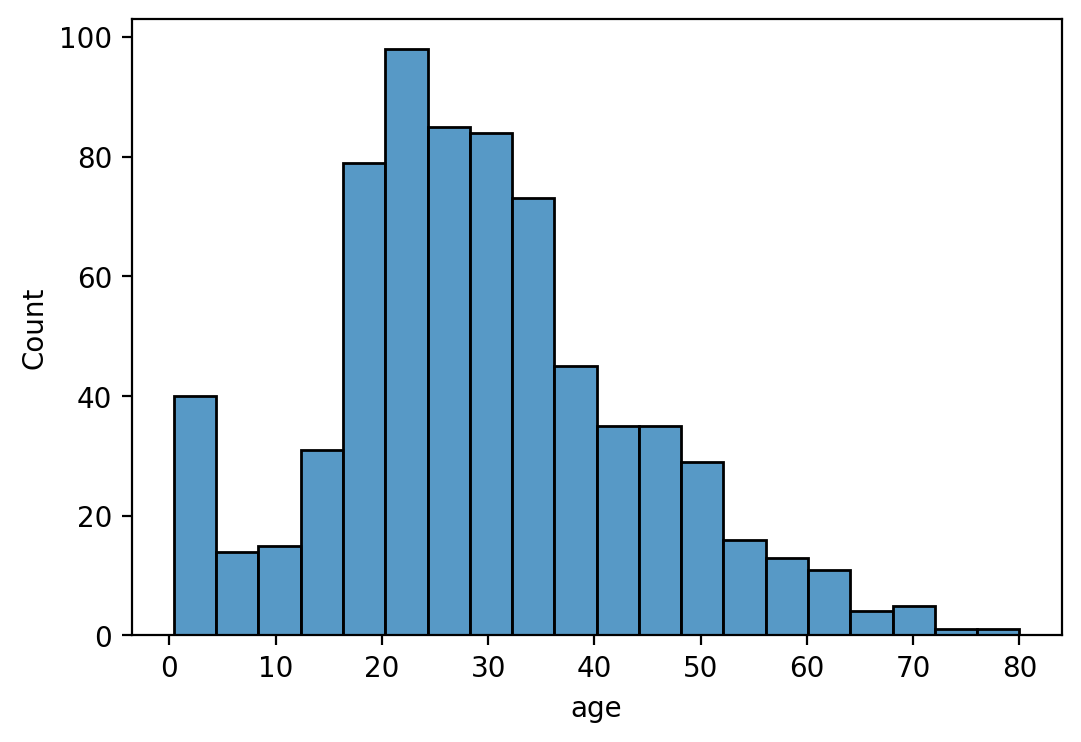

In [12]:
sns.histplot(data=df, x='age', bins=20)
plt.show()

## 사망자와 생존자별 나이 분포

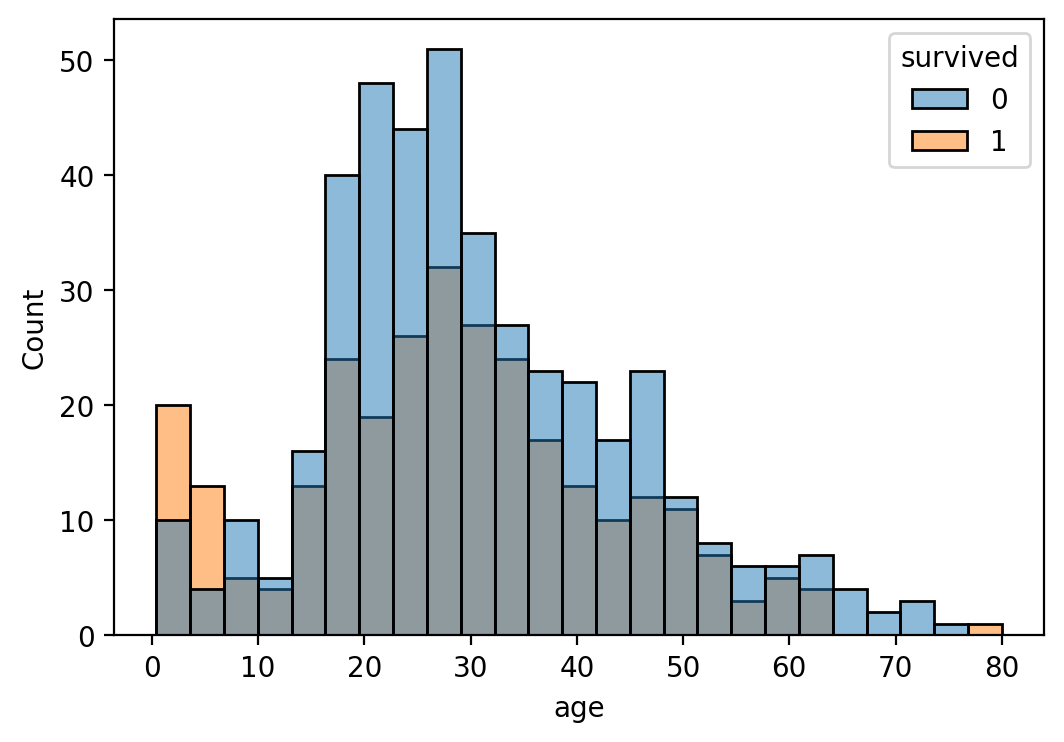

In [13]:
sns.histplot(data=df, x='age', bins=25, hue='survived')
plt.show()

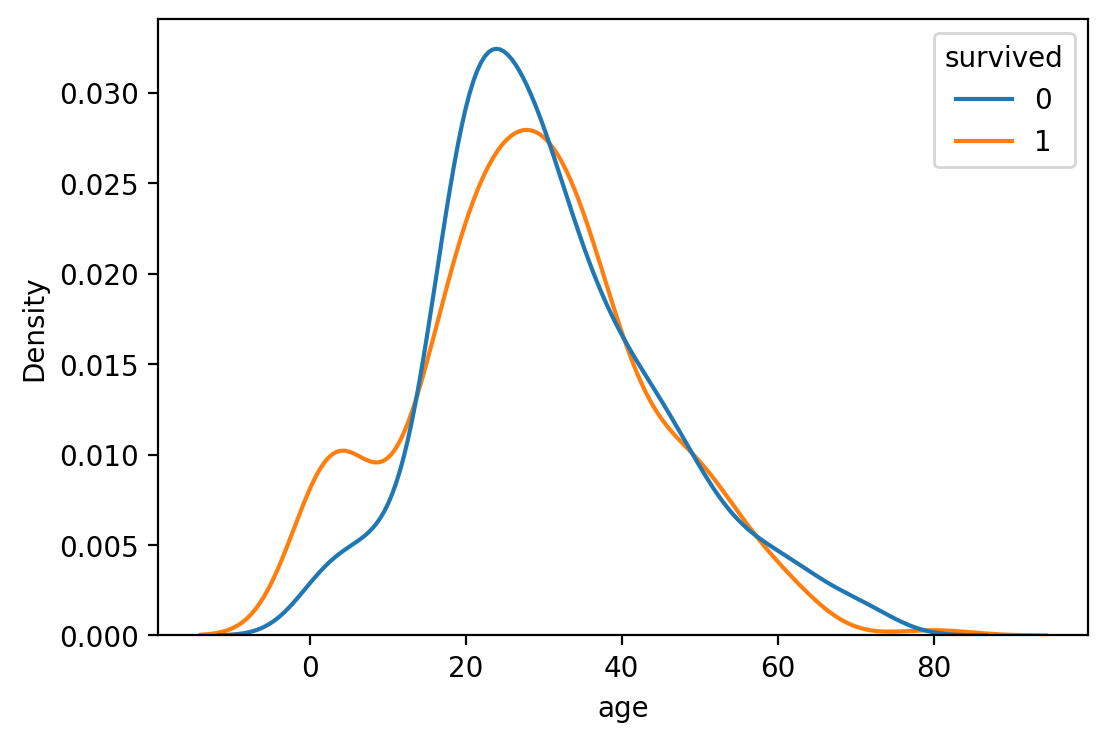

In [16]:
sns.kdeplot(df, x = 'age', hue='survived', common_norm=False)
plt.show()

# common_norm=False 를 함으로써 각 그룹의 분포를 독립적으로 비교가능

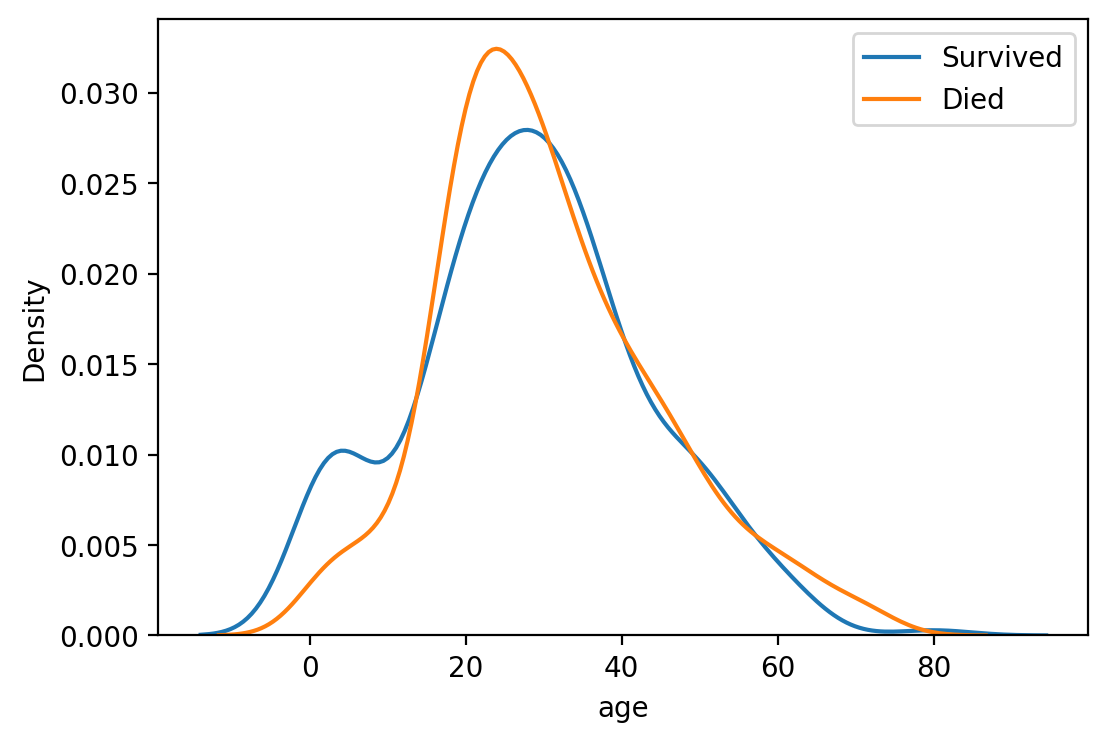

In [18]:
import warnings
warnings.filterwarnings('ignore')

s = df[df['survived'] == 1]
d = df[df['survived'] == 0]

sns.distplot(s['age'], bins=25, hist=False)
sns.distplot(d['age'], bins=25, hist=False)

plt.legend(['Survived', 'Died'])
plt.show()

# 방법2

## 객실등급,성별 간의 사망률

In [20]:
# 객실등급별 사망자 수
df.query('survived == 0')['pclass'].value_counts()

pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [21]:
# 성별 사망자 수
df.query('survived == 0')['sex'].value_counts()

sex
male      468
female     81
Name: count, dtype: int64

In [22]:
# 성별 생존률
df.groupby('sex').agg(arrived_mean=('survived', 'mean'))

,arrived_mean
sex,
female,0.742038
male,0.188908


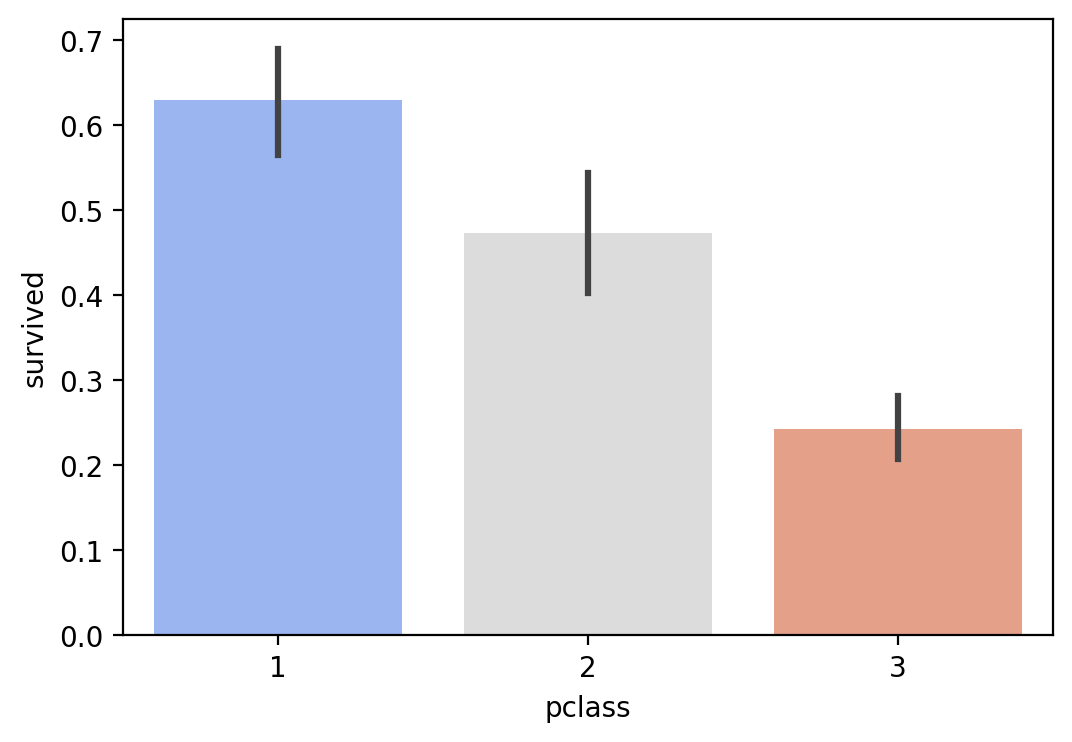

In [24]:
# 객실등급별 사망률
sns.barplot(data=df, x='pclass', y='survived',palette='coolwarm')
plt.show()

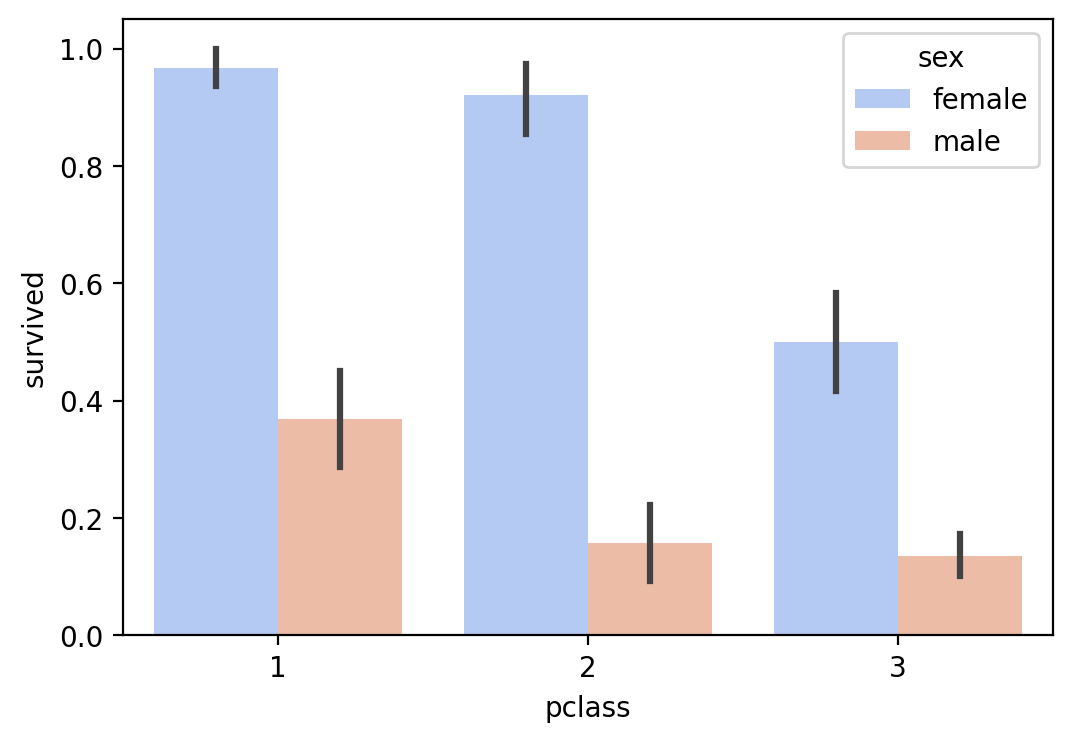

In [25]:
# 객실등급, 성별 사망률
sns.barplot(data=df, x='pclass', y='survived', hue='sex',palette='coolwarm')
plt.show()

## alone/ 탑승자수별 사망률 비교

In [26]:
df.groupby('alone').agg(arrived_mean=('survived', 'mean'))

,arrived_mean
alone,
False,0.505650
True,0.303538


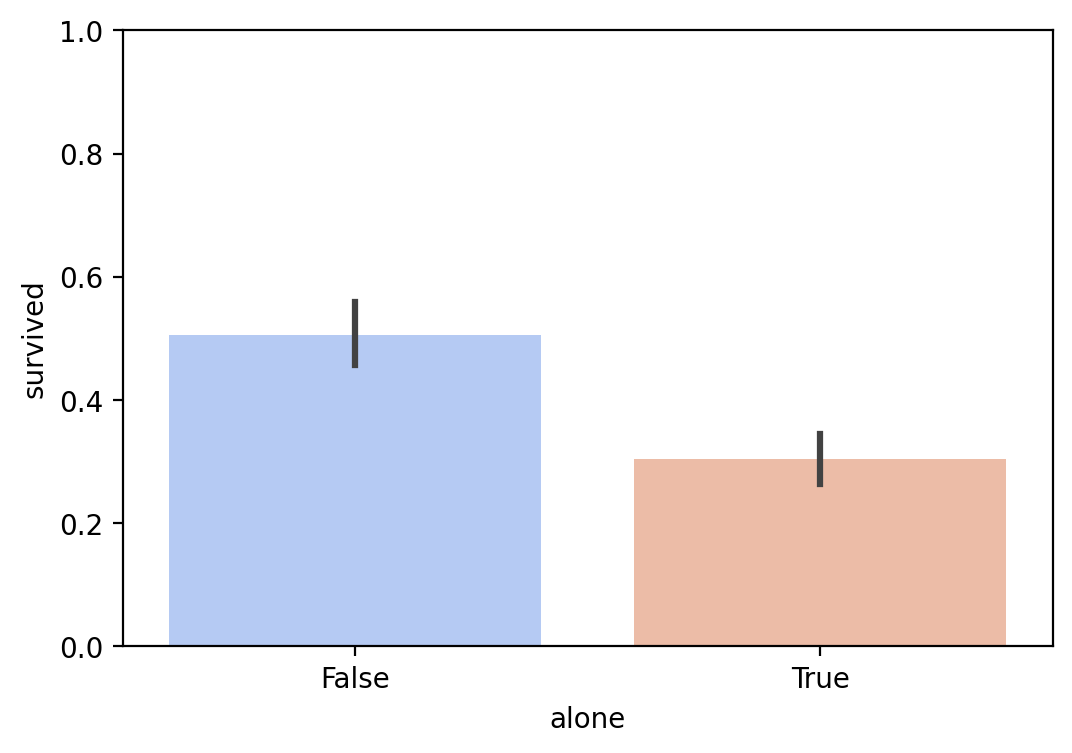

In [28]:
# alone별 사망률
sns.barplot(data=df, x='alone', y='survived',palette='coolwarm').set(ylim=[0,1])
plt.show()

In [29]:
# alone, 객실등급별 사망률
df.groupby(['pclass','alone']).agg(arrived_mean=('survived', 'mean'))

arrived_mean
pclass alone              
1      False      0.728972
       True       0.532110
2      False      0.637500
       True       0.346154
3      False      0.299401
       True       0.212963

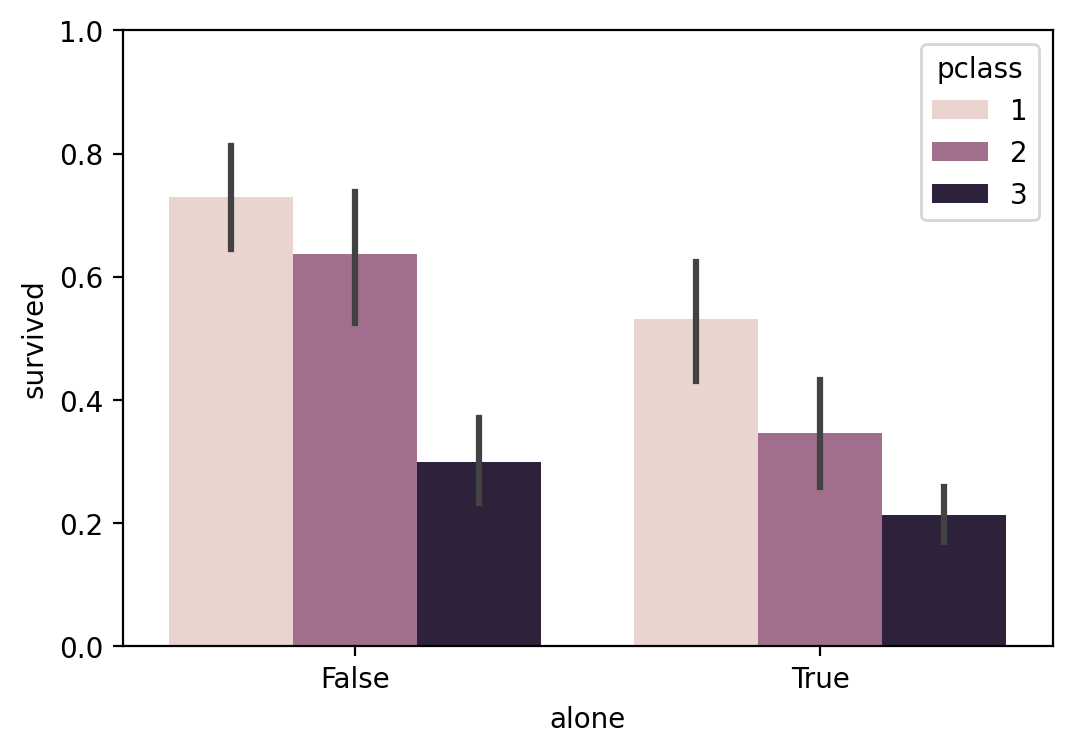

In [30]:
# alone, 객실등급별 사망률
sns.barplot(data=df, x='alone', y='survived', hue='pclass').set(ylim=[0,1])
plt.show()

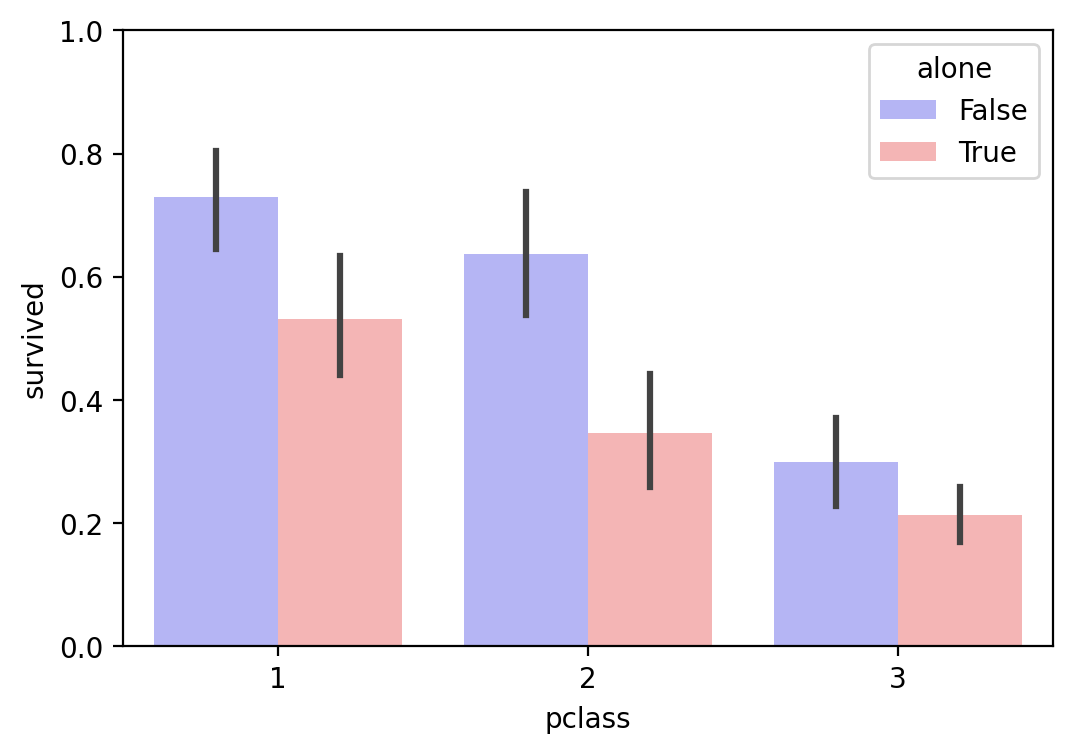

In [32]:
# alone, 객실등급별 사망률
sns.barplot(data=df, x='pclass', y='survived', hue='alone',palette='bwr').set(ylim=[0,1])
plt.show()

In [33]:
# sibsp 별 사망률

df[['sibsp', 'survived']].groupby(['sibsp']).mean()
#SibSp - 함께 탑승한 형제자매, 배우자 수 총합

,survived
sibsp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [34]:
#parch 별 사망률

df[['parch', 'survived']].groupby(['parch']).mean()
#Parch - 함께 탑승한 부모, 자녀 수 총합

,survived
parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [35]:
# sibsp + parch + 1 를 한 전체 인원수를 구한 p_total과 생존률

df.assign(p_total=(df['sibsp'] + df['parch'] + 1)).groupby('p_total').agg(arrived_mean=('survived', 'mean'))

,arrived_mean
p_total,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [36]:
# p_total 열 추가

df['p_total']=df['sibsp'] + df['parch'] + 1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,p_total
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


In [37]:
# pclass별 p_total 수

df['p_total'].groupby(df['pclass']).value_counts()

pclass  p_total
1       1          109
        2           70
        3           24
        4            7
        6            4
        5            2
2       1          104
        2           34
        3           31
        4           13
        6            1
        5            1
3       1          324
        2           57
        3           47
        6           17
        7           12
        5           12
        4            9
        11           7
        8            6
Name: count, dtype: int64

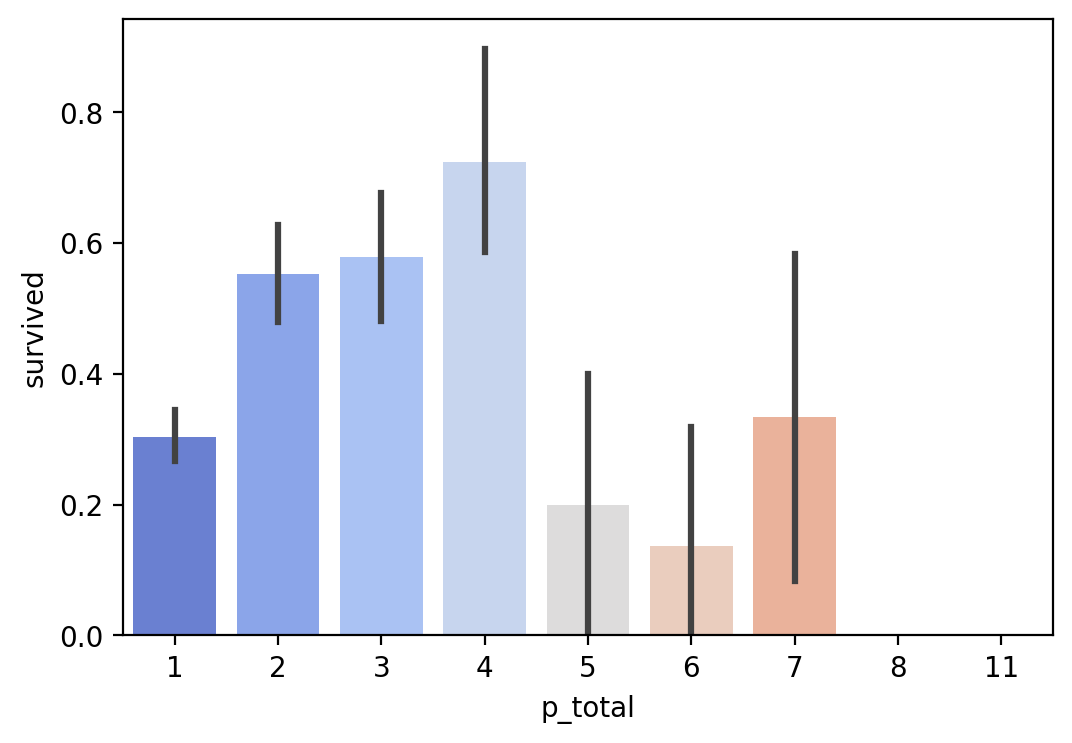

In [38]:
#p_total 당 생존률

sns.barplot(data=df, x='p_total', y='survived',palette='coolwarm')
plt.show()

In [39]:
#p_total과 객실등급별 생존률

df.groupby(['pclass','p_total']).agg(arrived_mean=('survived', 'mean'))

arrived_mean
pclass p_total              
1      1            0.532110
       2            0.728571
       3            0.750000
       4            0.714286
       5            1.000000
       6            0.500000
2      1            0.346154
       2            0.529412
       3            0.677419
       4            0.769231
       5            1.000000
       6            1.000000
3      1            0.212963
       2            0.350877
       3            0.425532
       4            0.666667
       5            0.000000
       6            0.000000
       7            0.333333
       8            0.000000
       11           0.000000

<Axes: xlabel='p_total', ylabel='survived'>

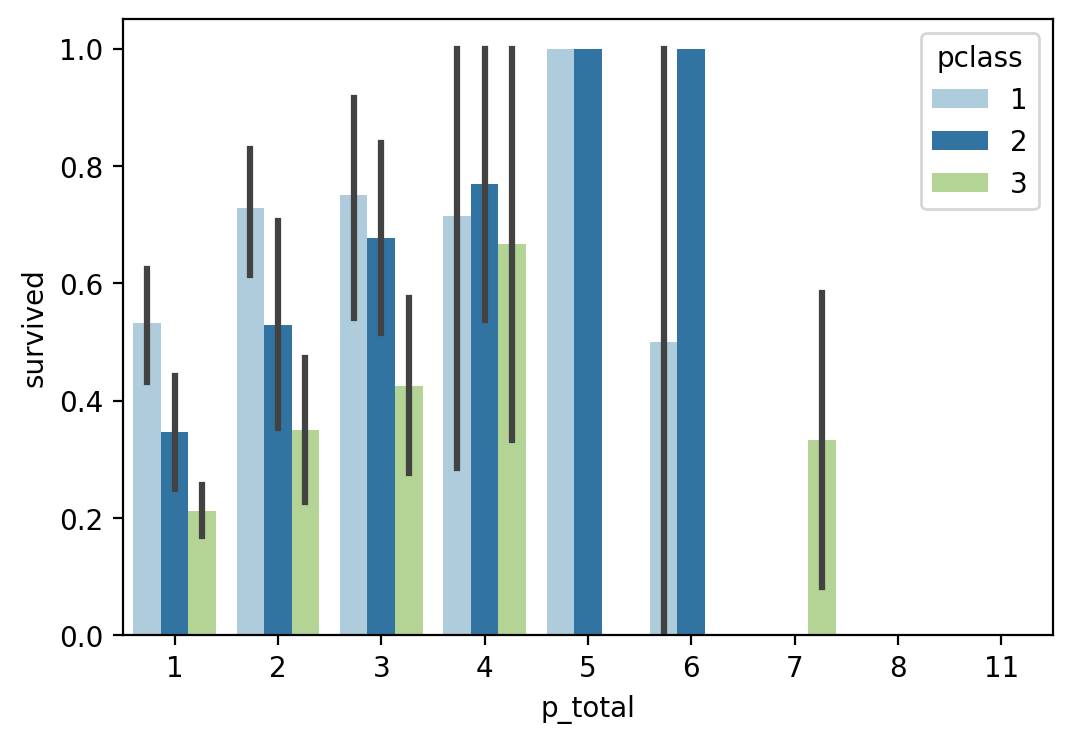

In [40]:
#p_total과 객실등급별 생존률
sns.barplot(data=df, x='p_total', y='survived', hue='pclass',palette='Paired')

<Axes: xlabel='p_total', ylabel='survived'>

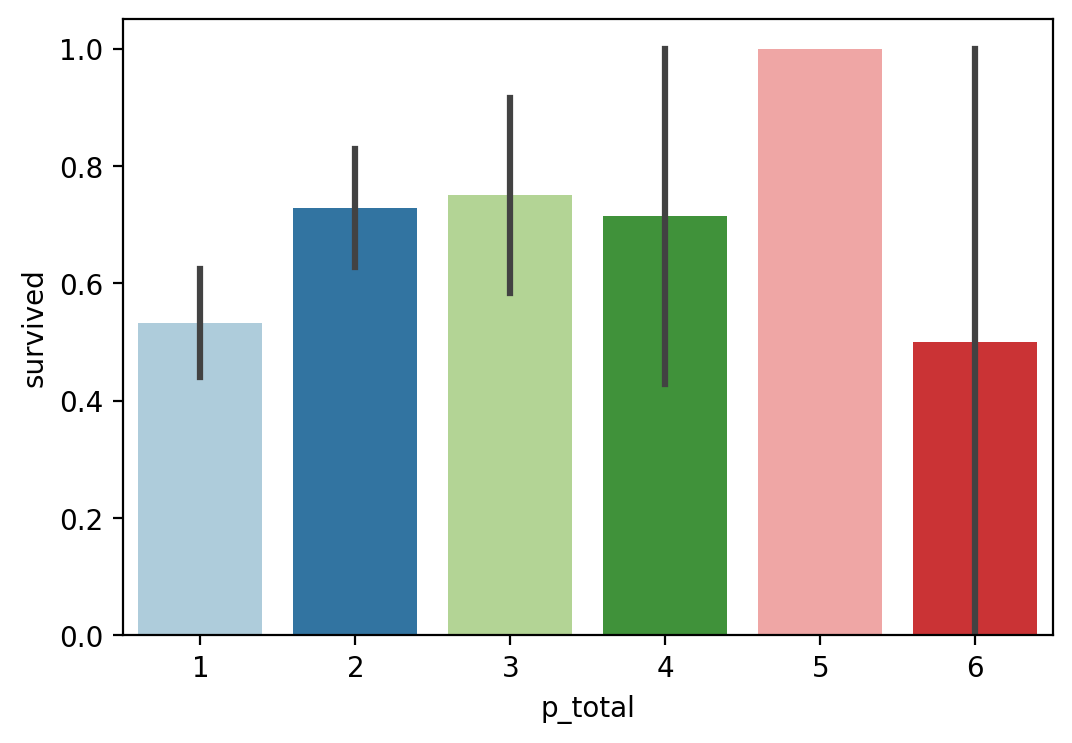

In [41]:
# first객실등급의 p_total당 생존률

df1 = df[df['pclass'] == 1]
df2 = df[df['pclass'] == 2]
df3 = df[df['pclass'] == 3]

sns.barplot(data=df1, x='p_total', y='survived', palette='Paired')

<Axes: xlabel='p_total', ylabel='survived'>

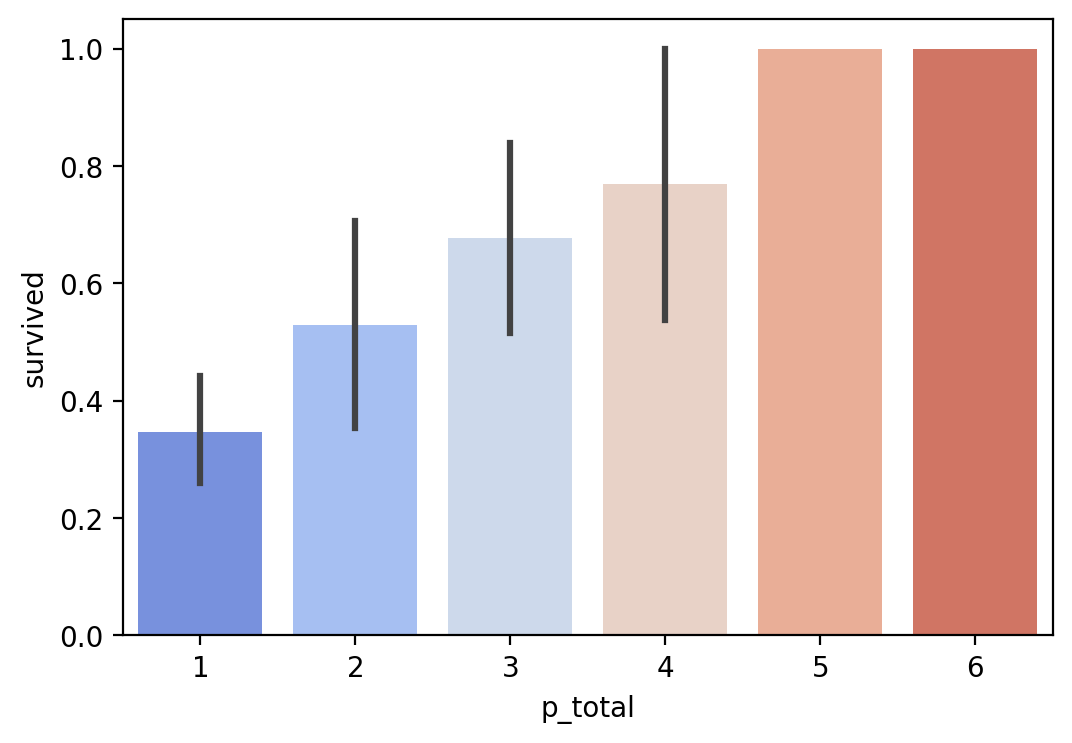

In [42]:
# second 객실등급의 p_total당 생존률
sns.barplot(data=df2, x='p_total', y='survived',palette='coolwarm')

<Axes: xlabel='p_total', ylabel='survived'>

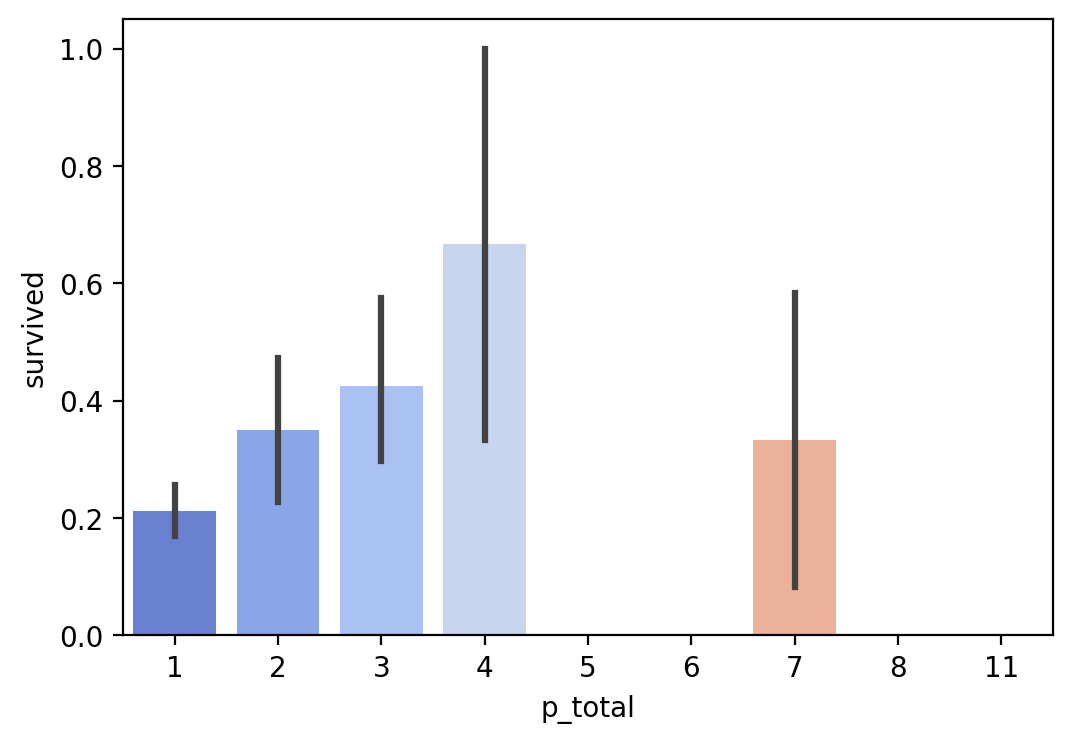

In [43]:
# third 객실등급의 p_total당 생존률

sns.barplot(data=df3, x='p_total', y='survived', palette='coolwarm')

## 요금과 생존률 상관관계

In [44]:
#요금 요약통계

df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [46]:
#객실등급별 요금통계

df.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


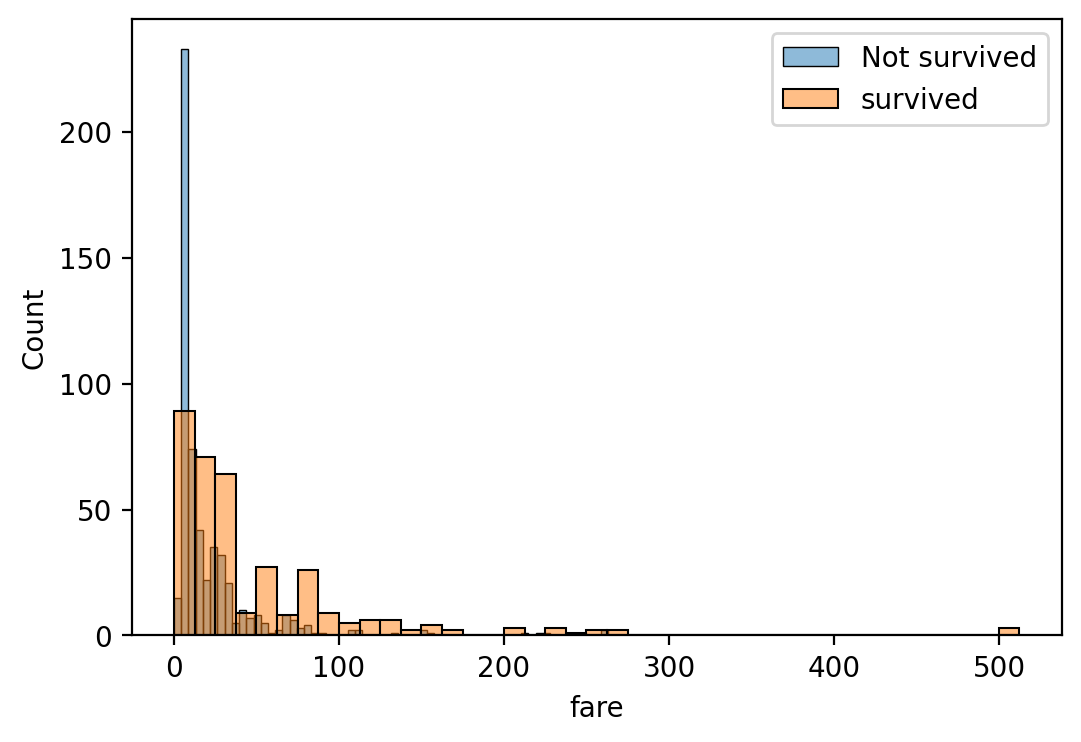

In [47]:
#요금별 생존률

sns.histplot(df[df.survived == 0]["fare"], label="Not survived", alpha = 0.5)
sns.histplot(df[df.survived == 1]["fare"], label="survived", alpha = 0.5)
plt.legend()
plt.show()

In [48]:
#생존여부에 따른 객실 등급별 평균

df.groupby(['survived','pclass']).agg(fare_mean=('fare', 'mean'))

fare_mean
survived pclass           
0        1       64.684007
         2       19.412328
         3       13.669364
1        1       95.608029
         2       22.055700
         3       13.694887

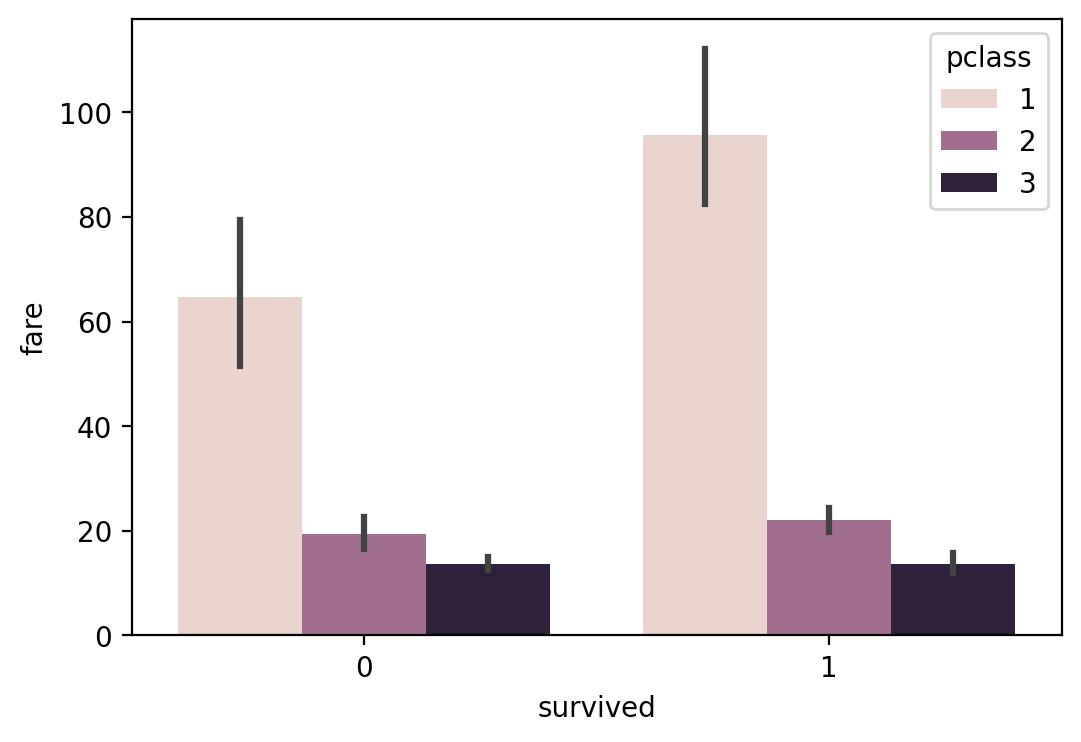

In [53]:
#생존여부에 따른 객실 등급별 평균

sns.barplot(data=df, x='survived', y='fare', hue='pclass')
plt.show()

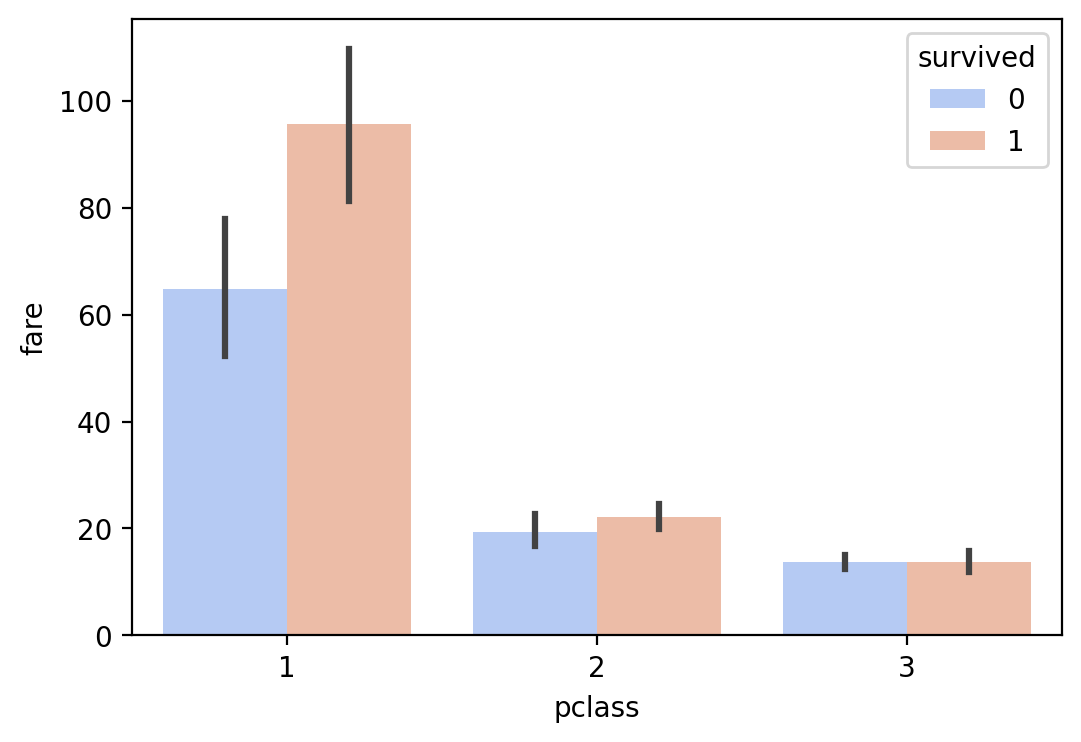

In [51]:
#생존여부에 따른 객실 등급별 평균

sns.barplot(data=df, x='pclass', y='fare', hue='survived', palette='coolwarm')
plt.show()

## 탑승지역과의 상관관계

#### 타이타닉 호는 Southampton-> Cherbourg -> Queenstown 순으로 기항 이후 침몰

In [54]:
# 탑승지역별 생존률

df.groupby('embarked').agg(arrived_mean=('survived', 'mean'))

,arrived_mean
embarked,
C,0.553571
Q,0.389610
S,0.336957


In [55]:
# 탑승지역및 등급별 평균 가족단위

df.groupby(['embarked','pclass']).agg(pto_mean=('p_total', 'mean'))

pto_mean
embarked pclass          
C        1       1.694118
         2       2.117647
         3       1.727273
Q        1       2.500000
         2       1.000000
         3       1.597222
S        1       1.826772
         2       1.762195
         3       2.144476

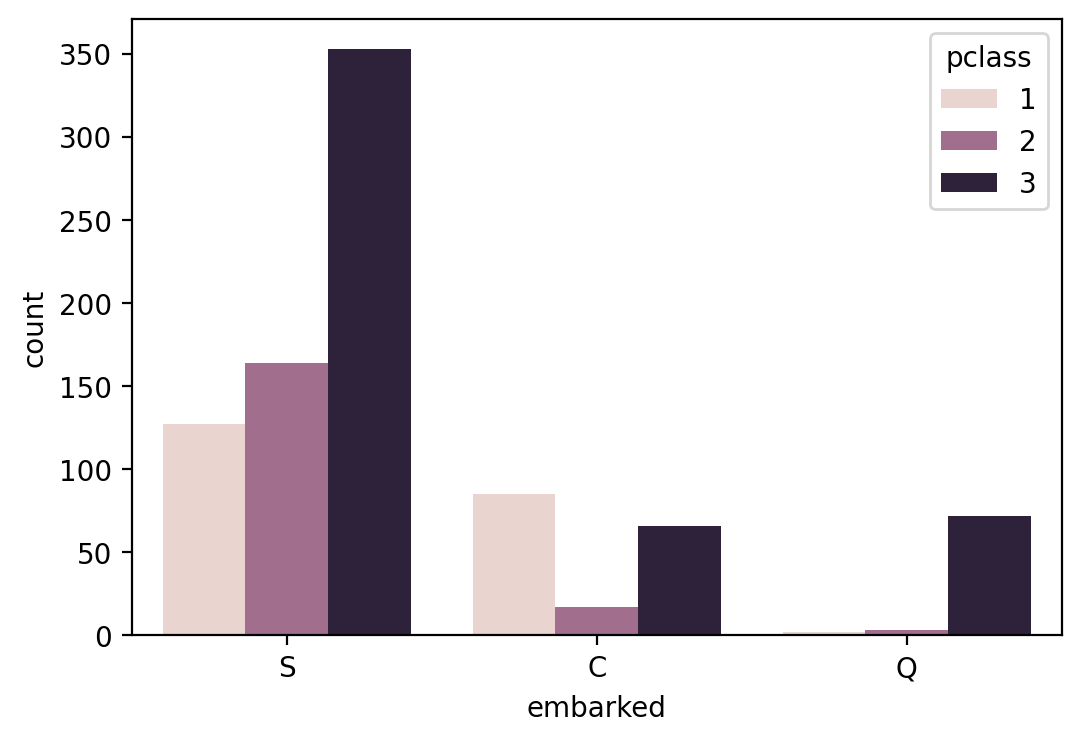

In [58]:
# 탑승지역별 객실등급 인원수

sns.countplot(data=df, x='embarked', hue='pclass')
plt.show()

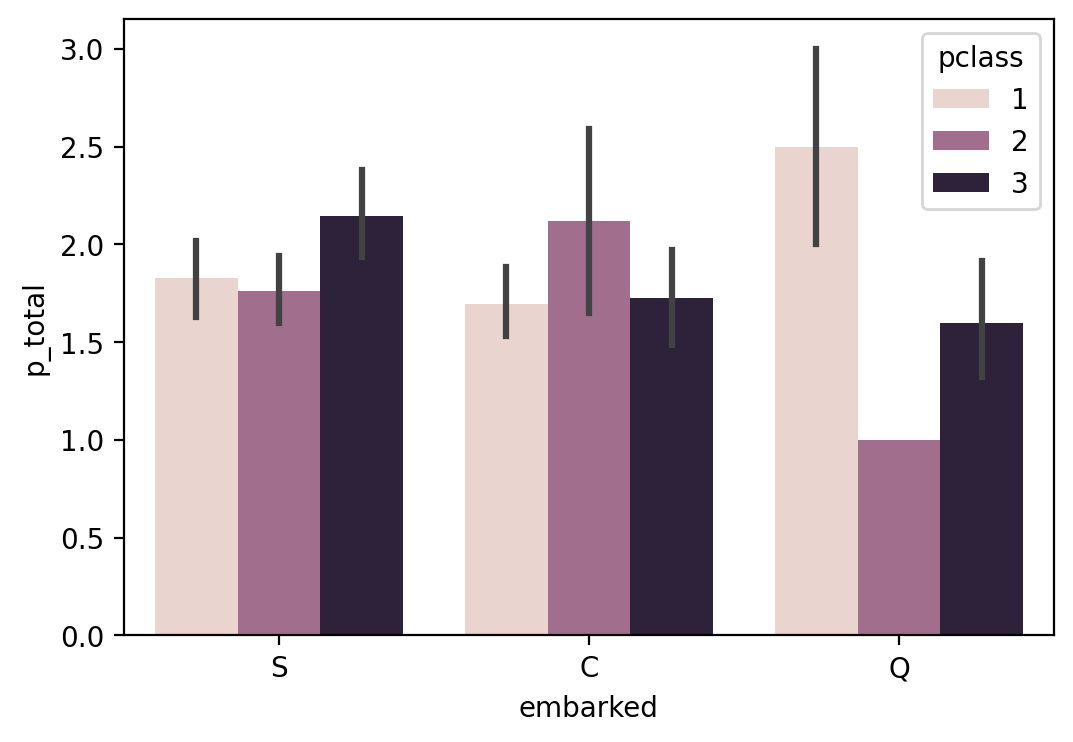

In [59]:
# 탑승지역및 객실등급별 평균 가족 단위원수

sns.barplot(data=df, x='embarked', y='p_total', hue='pclass')
plt.show()

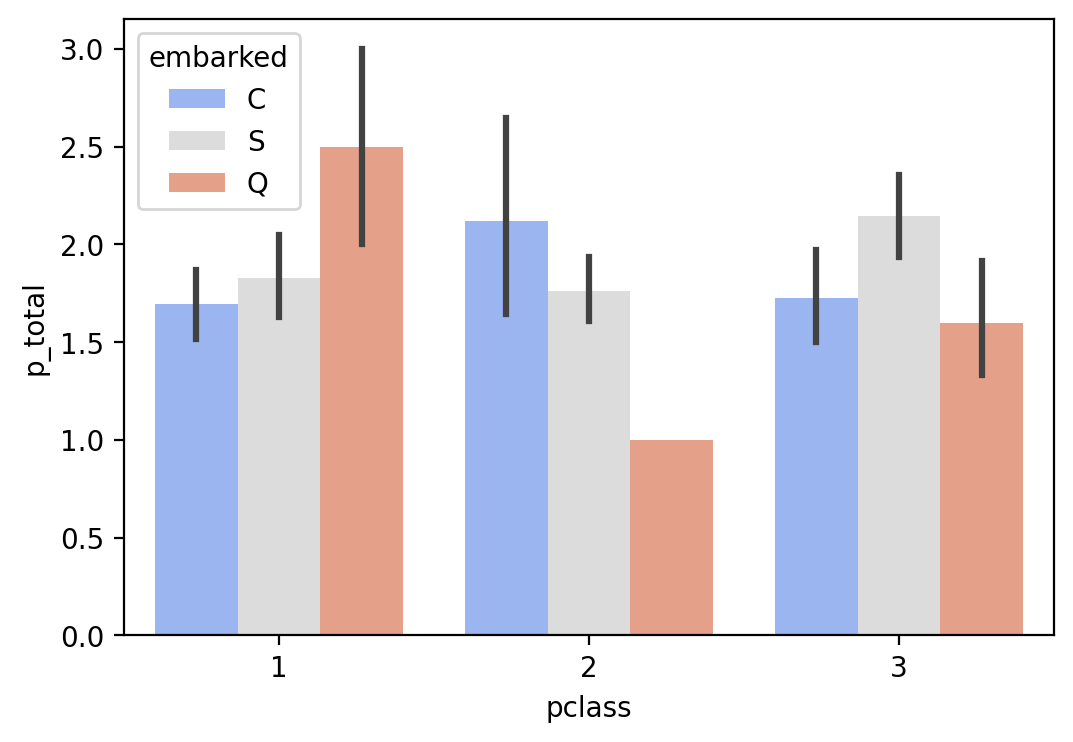

In [61]:
# 탑승지역및 객실등급별 평균 가족 단위원수

sns.barplot(data=df, x='pclass', y='p_total', hue='embarked', palette='coolwarm')
plt.show()

In [62]:
# 탑승지역 및 객실등급별 평균생존률

df.groupby(['embarked','pclass']).agg(arrived_mean=('survived', 'mean'))

arrived_mean
embarked pclass              
C        1           0.694118
         2           0.529412
         3           0.378788
Q        1           0.500000
         2           0.666667
         3           0.375000
S        1           0.582677
         2           0.463415
         3           0.189802

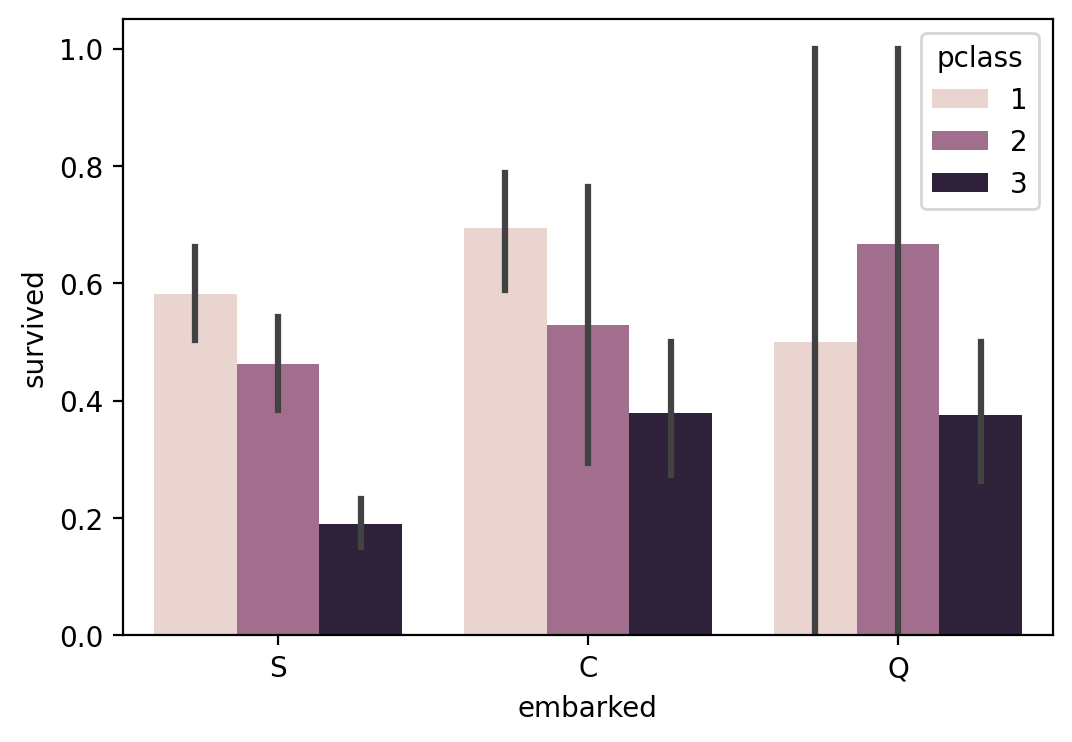

In [64]:
# 탑승지역 및 객실등급별 평균생존률

sns.barplot(data=df, x='embarked', y='survived', hue='pclass')
plt.show()

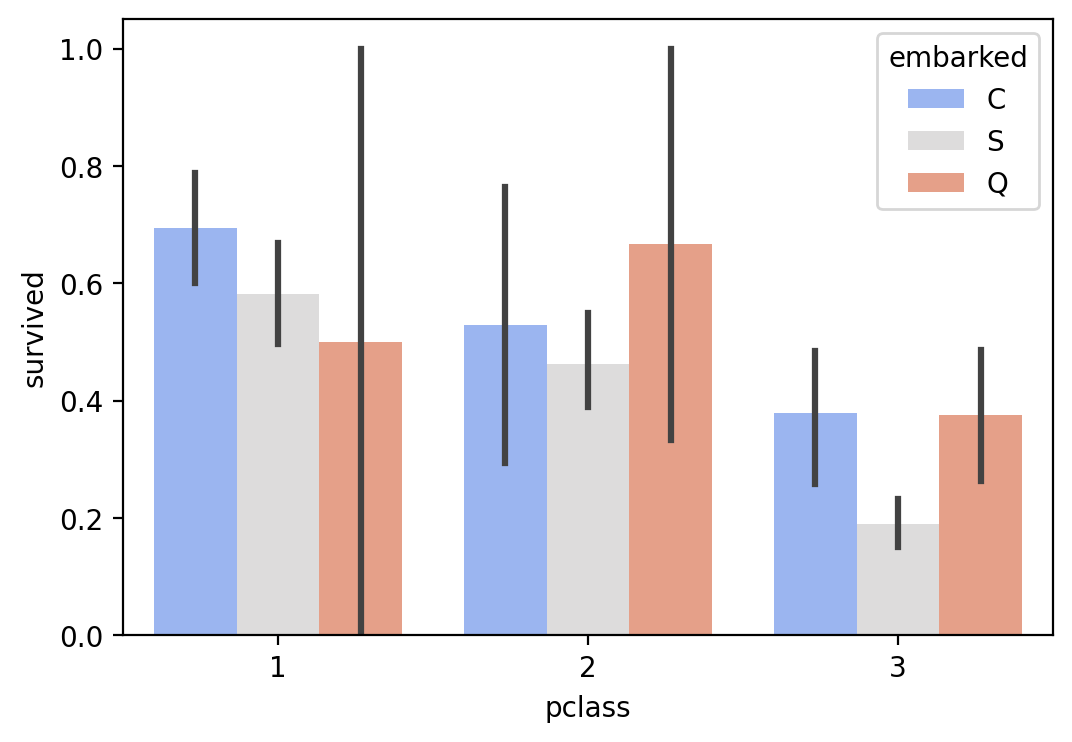

In [65]:
# 탑승지역 및 객실등급별 평균생존률

sns.barplot(data=df, x='pclass', y='survived', hue='embarked', palette='coolwarm')
plt.show()

# Earthquake dataset
- 출처 : https://www.kaggle.com/datasets/warcoder/earthquake-dataset

- title: 지진에 붙은 제목 이름
- magnitude: 지진의 규모
- date_time: 날짜 및 시간
- cdi: 이벤트 범위에 대해 보고된 최대 강도
- mmi: 이벤트에 대한 최대 추정 기기 강도
- alert: 경고 수준 - "녹색", "노란색", "주황색", "빨간색"
- tsunami(쓰나미): 해양 지역에서 발생하는 사건의 경우 "1", 그렇지 않은 경우 "0"

- sig: 이벤트의 중요성을 설명하는 숫자입니다. 숫자가 클수록 더 중요한 이벤트를 나타냅니다. 이 값은 크기, 최대 MMI, 펠트 보고서 및 예상 영향을 포함한 여러 요소에 따라 결정됩니다.
- net: 데이터 기여자의 ID입니다. 이 이벤트에 대한 기본 정보 소스로 간주되는 네트워크를 식별합니다.
- nst: 지진 위치를 결정하는 데 사용되는 지진 관측소의 총 수입니다.
- dmin : 진앙에서 가장 가까운 관측소까지의 수평거리
- gap(간격): 방위상으로 인접한 측점 사이의 최대 방위각 간격(도 단위)입니다. 일반적으로 이 숫자가 작을수록 계산된 지진의 수평 위치가 더 신뢰할 수 있습니다. 방위각 간격이 180도를 초과하는 지진 위치는 일반적으로 위치 및 깊이 불확실성이 큽니다.
- magType: 이벤트의 선호 크기를 계산하는 데 사용되는 방법 또는 알고리즘
- depth(깊이): 지진이 파열되기 시작하는 깊이
- latitude / longitude(위도/경도): 지구 표면의 어떤 장소의 위치나 위치를 결정하고 설명할 수 있는 좌표계
- location(위치): 해당 국가 내 위치
- continent(대륙) : 지진 피해국의 대륙
- country(국가): 영향을 받은 국가

## 데이터 전처리

In [68]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [69]:
!pip install koreanize_matplotlib

In [70]:
import koreanize_matplotlib

In [71]:
!git clone https://github.com/hyeonyeongjung/data

Cloning into 'data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 44.09 KiB | 2.00 MiB/s, done.


In [77]:
df4 = pd.read_csv('data/earthquake_1995-2023.csv')

In [78]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [79]:
df4.describe(include="all")

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
count,1000,1000.000000,1000,1000.000000,1000.00000,449,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,994,284,651
unique,984,NaN,990,NaN,NaN,4,NaN,NaN,11,NaN,NaN,NaN,9,NaN,NaN,NaN,502,6,56
top,"M 6.5 - Kermadec Islands, New Zealand",NaN,11-01-2022 12:39,NaN,NaN,green,NaN,NaN,us,NaN,NaN,NaN,mww,NaN,NaN,NaN,"Kokopo, Papua New Guinea",Asia,Indonesia
freq,3,NaN,3,NaN,NaN,353,NaN,NaN,960,NaN,NaN,NaN,502,NaN,NaN,NaN,29,137,140
mean,NaN,6.940150,NaN,3.605000,6.02700,NaN,0.325000,847.915000,NaN,193.918000,1.125174,20.926290,NaN,74.612541,4.315554,51.486576,NaN,NaN,NaN
std,NaN,0.438148,NaN,3.328972,1.43399,NaN,0.468609,301.802632,NaN,239.045858,2.073164,24.415895,NaN,130.812590,26.633320,117.478302,NaN,NaN,NaN
min,NaN,6.500000,NaN,0.000000,1.00000,NaN,0.000000,650.000000,NaN,0.000000,0.000000,0.000000,NaN,2.700000,-61.848400,-179.968000,NaN,NaN,NaN
25%,NaN,6.600000,NaN,0.000000,5.00000,NaN,0.000000,691.000000,NaN,0.000000,0.000000,0.000000,NaN,16.000000,-13.518500,-71.694450,NaN,NaN,NaN
50%,NaN,6.800000,NaN,4.000000,6.00000,NaN,0.000000,744.000000,NaN,0.000000,0.000000,18.000000,NaN,29.000000,-2.443500,107.791000,NaN,NaN,NaN
75%,NaN,7.100000,NaN,7.000000,7.00000,NaN,1.000000,874.250000,NaN,403.000000,1.549250,27.000000,NaN,55.000000,25.167250,148.364750,NaN,NaN,NaN


In [80]:
df4.count()

title        1000
magnitude    1000
date_time    1000
cdi          1000
mmi          1000
alert         449
tsunami      1000
sig          1000
net          1000
nst          1000
dmin         1000
gap          1000
magType      1000
depth        1000
latitude     1000
longitude    1000
location      994
continent     284
country       651
dtype: int64

## 최대강도(cdi)에 따른 경고 수준(alert)

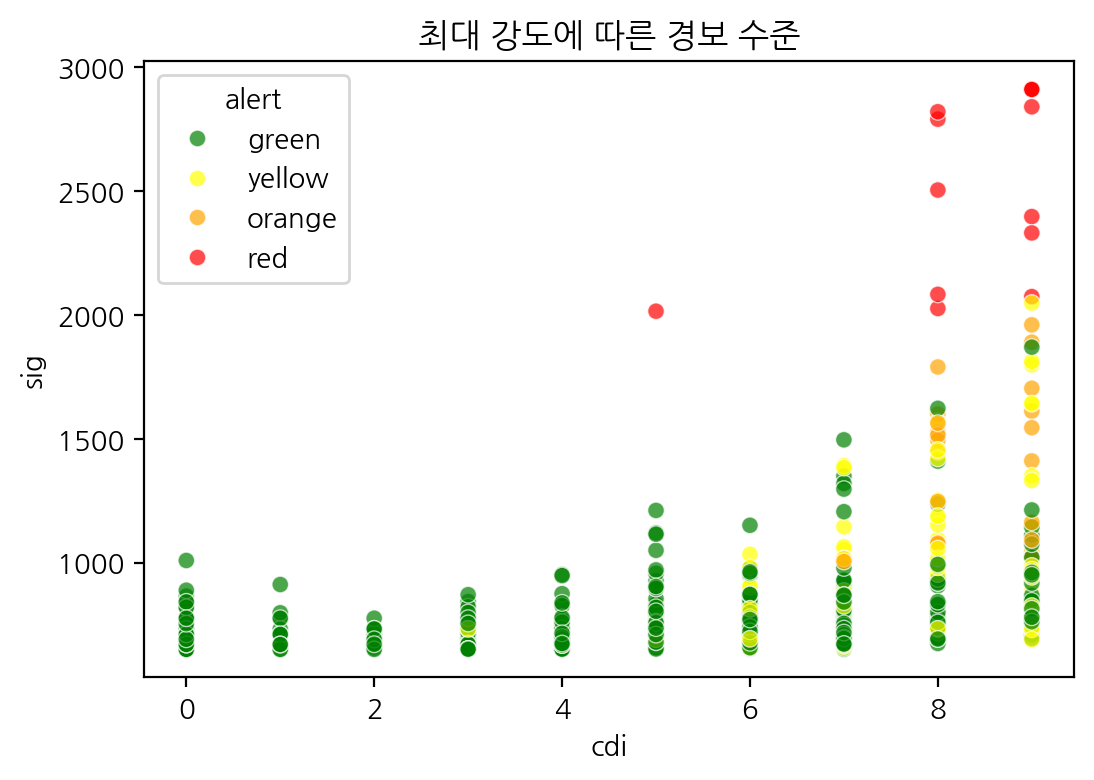

In [82]:
# 방법1
palette = {'green': 'green', 'yellow': 'yellow', 'orange': 'orange', 'red': 'red'}
sns.scatterplot(data=df4, x='cdi', y = 'sig', hue='alert', palette=palette, alpha=0.7)
plt.title('최대 강도에 따른 경보 수준')
plt.show()

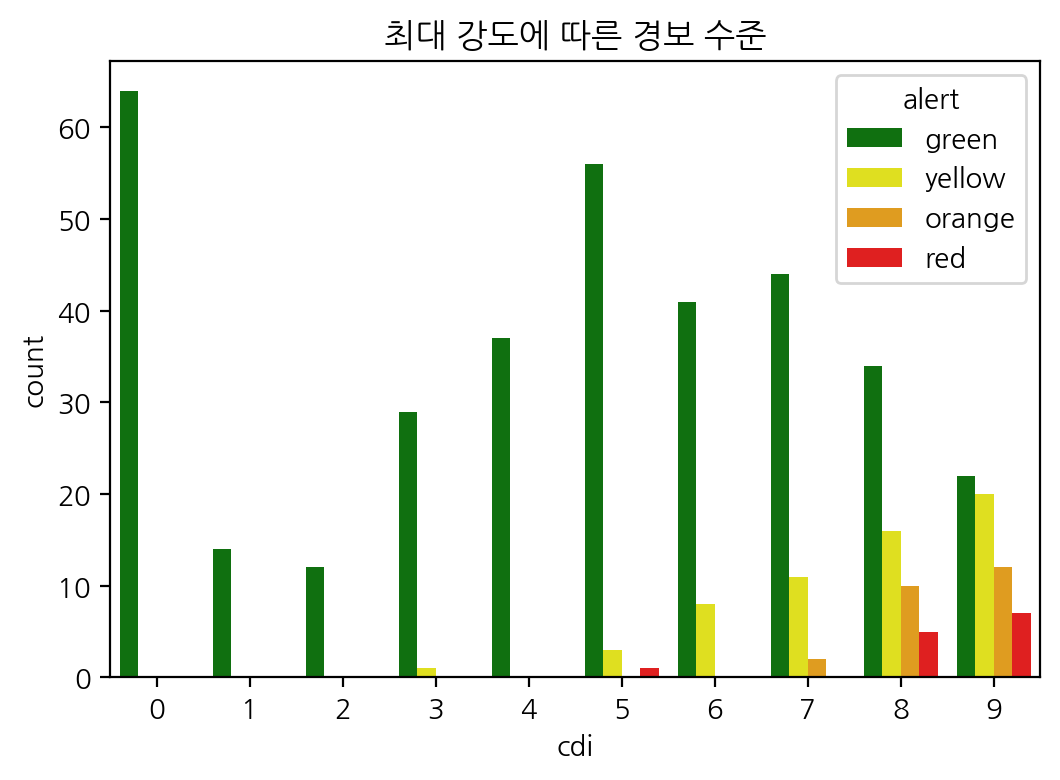

In [83]:
# 방법2
from pandas.api.types import CategoricalDtype

alert_order = CategoricalDtype(['green', 'yellow', 'orange', 'red'], ordered=True)
df4['alert'] = df4['alert'].astype(alert_order)

sns.countplot(data=df4, x='cdi', hue='alert', palette=palette)
plt.title('최대 강도에 따른 경보 수준')
plt.show()

## 연도, 월 별 지진 발생 횟수

In [84]:
df4['date_time'] = pd.to_datetime(df4['date_time'])
df4['Year'] = df4['date_time'].dt.year
df4['Month'] = df4['date_time'].dt.month

yearly_counts = df4['Year'].value_counts().sort_index()
print("연도별 지진 발생 횟수:\n", yearly_counts)

monthly_counts = df4['Month'].value_counts().sort_index()
print("\n월별 지진 발생 횟수:\n", monthly_counts)

연도별 지진 발생 횟수:
 Year
1995    29
1996    35
1997    28
1998    23
1999    33
2000    35
2001    28
2002    25
2003    31
2004    32
2005    28
2006    26
2007    37
2008    25
2009    26
2010    41
2011    34
2012    31
2013    53
2014    48
2015    53
2016    43
2017    36
2018    43
2019    33
2020    27
2021    42
2022    41
2023    34
Name: count, dtype: int64

월별 지진 발생 횟수:
 Month
1      85
2      79
3      81
4      95
5      81
6      57
7      77
8      85
9      92
10     90
11    107
12     71
Name: count, dtype: int64


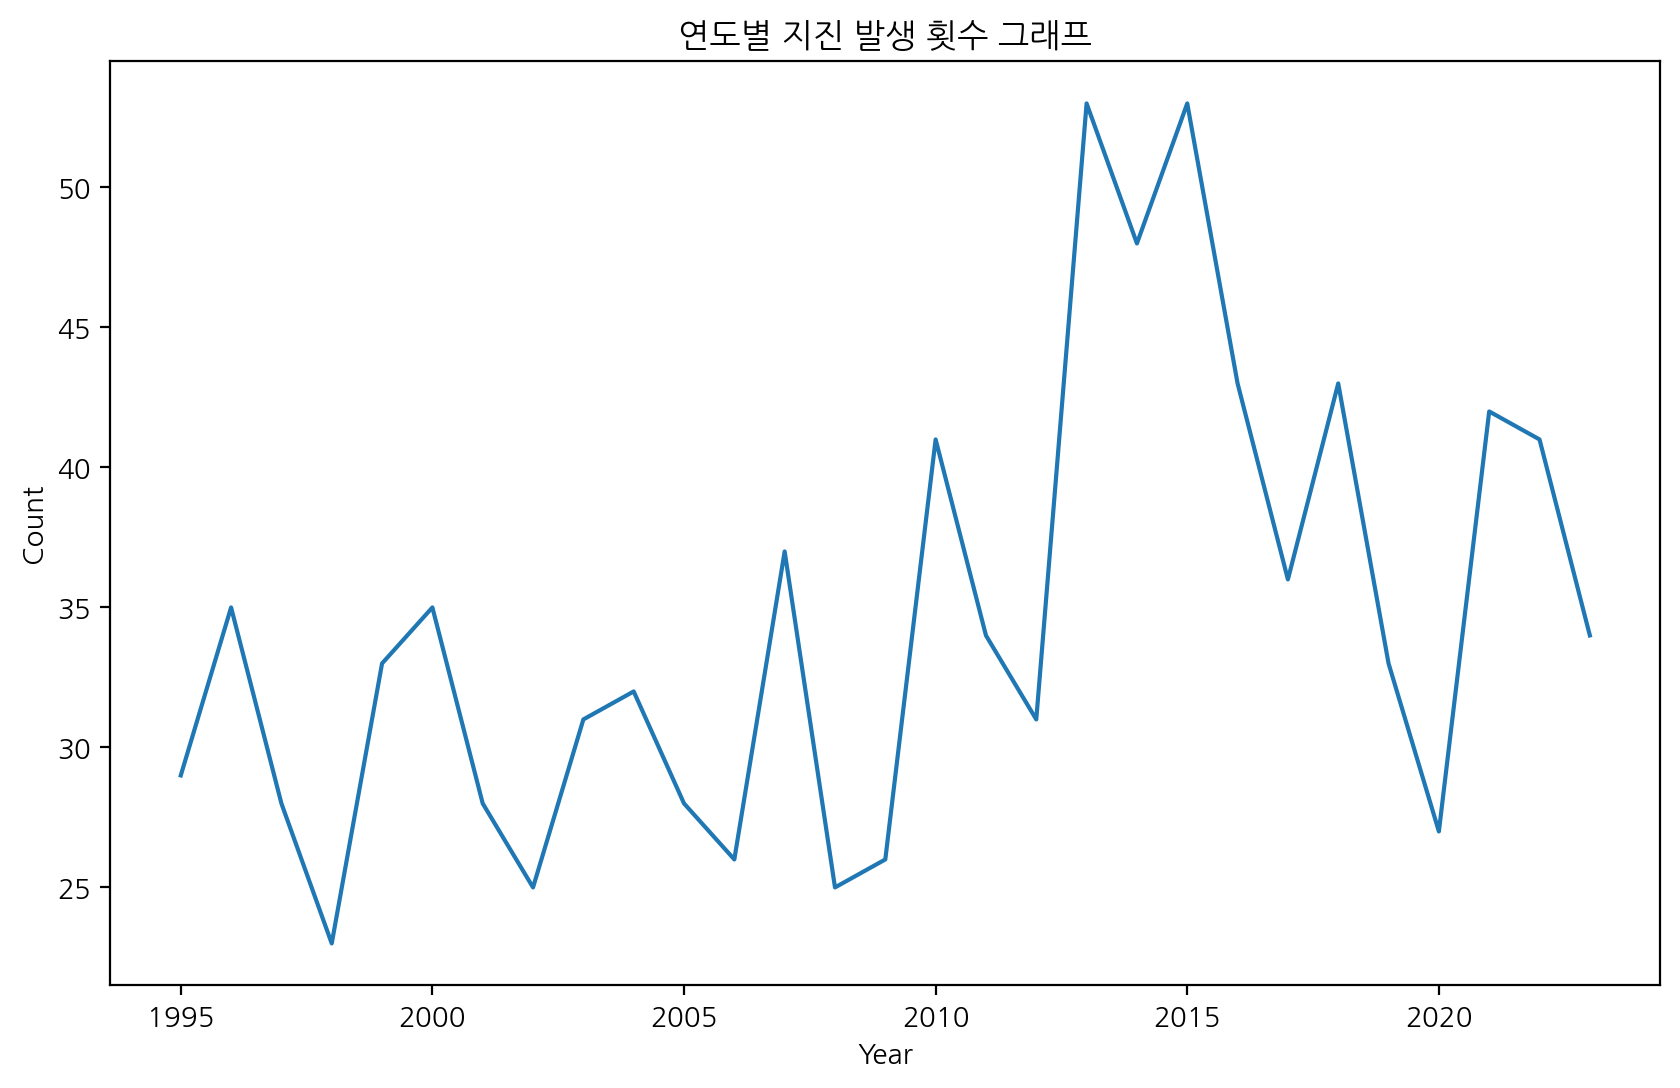

In [85]:
# 연도별 지진 발생 횟수 그래프
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_counts)
plt.title('연도별 지진 발생 횟수 그래프')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

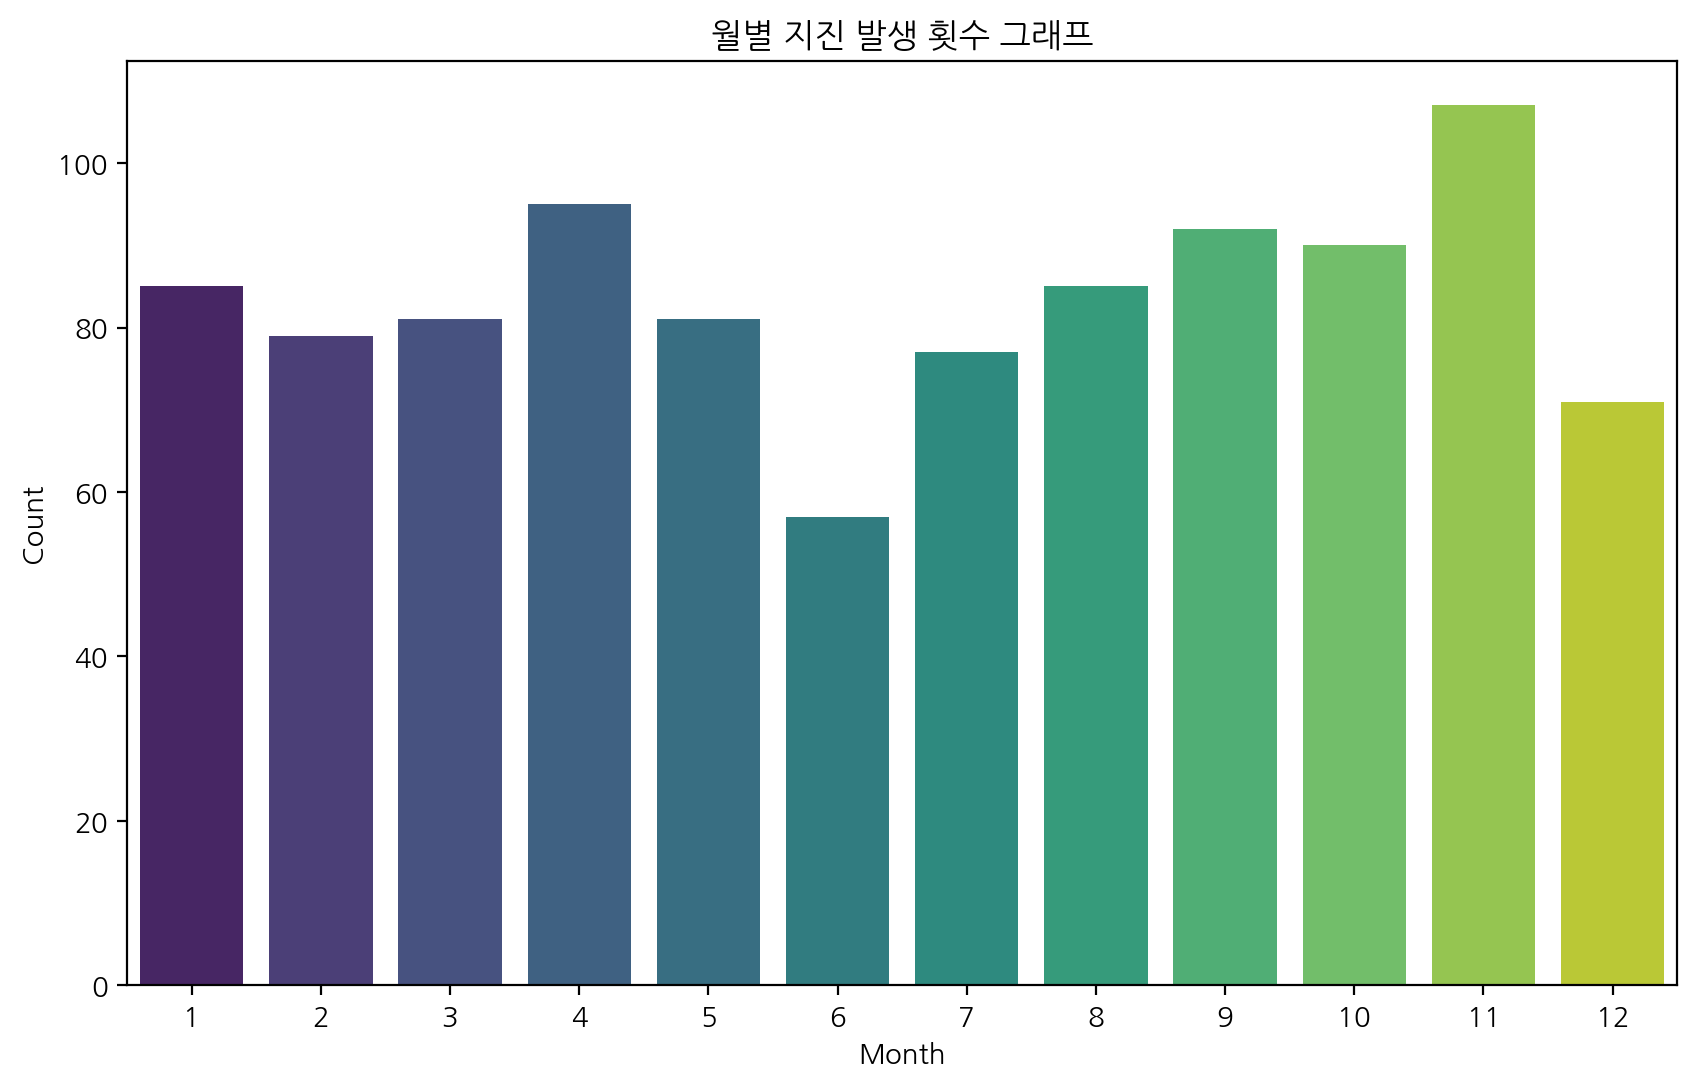

In [86]:
# 월별 지진 발생 횟수 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('월별 지진 발생 횟수 그래프')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

## 국가별/지역별 발생하는 지진 빈도

In [88]:
import plotly.express as px

df4['location'] = df4['location'].str.split(', ').str[-1]
s = df4['location'].value_counts().sort_values(ascending=False).reset_index()
top_15 = s.iloc[:15, 0].to_list()
s['location'] = s['location'].apply(lambda x: 'Other' if x not in top_15 else x)
s = s.groupby('location').agg('sum').reset_index().sort_values(by='count', ascending=False)

pull = [0] * len(s)
for i in range(4):
    pull[i] = 0.14

gradient = ['#D81159', '#EA320D', '#D70F0F', '#EE5622',
            '#F18805', '#F0A202', '#F0F600', '#ECA72C',
            '#C37D92', '#8F3985', '#8F2D56', '#D88C9A',
            '#FF729F', '#A4036F', '#A675A1', '#8A1C7C']

fig2 = px.pie(s, names='location', values='count', title='국가별/지역별 발생하는 지진 빈도', color_discrete_sequence=gradient)
fig2.update_traces(hole=0.3, pull=pull)
fig2.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)
fig2.show()

# 아래 표에서 Other 클릭시 Other을 제외한 표를 볼 수 있다

## 지진의 규모와 쓰나미의 상관관계

In [91]:
df4['magnitude'] = df4['magnitude'].astype(int)
# magnaitude 데이터의 소수점 아래 값 없애기

In [92]:
magnitude_stats = df4['magnitude'].describe()
print("\n지진 규모 통계값:\n", magnitude_stats)


지진 규모 통계값:
 count    1000.000000
mean        6.407000
std         0.560058
min         6.000000
25%         6.000000
50%         6.000000
75%         7.000000
max         9.000000
Name: magnitude, dtype: float64


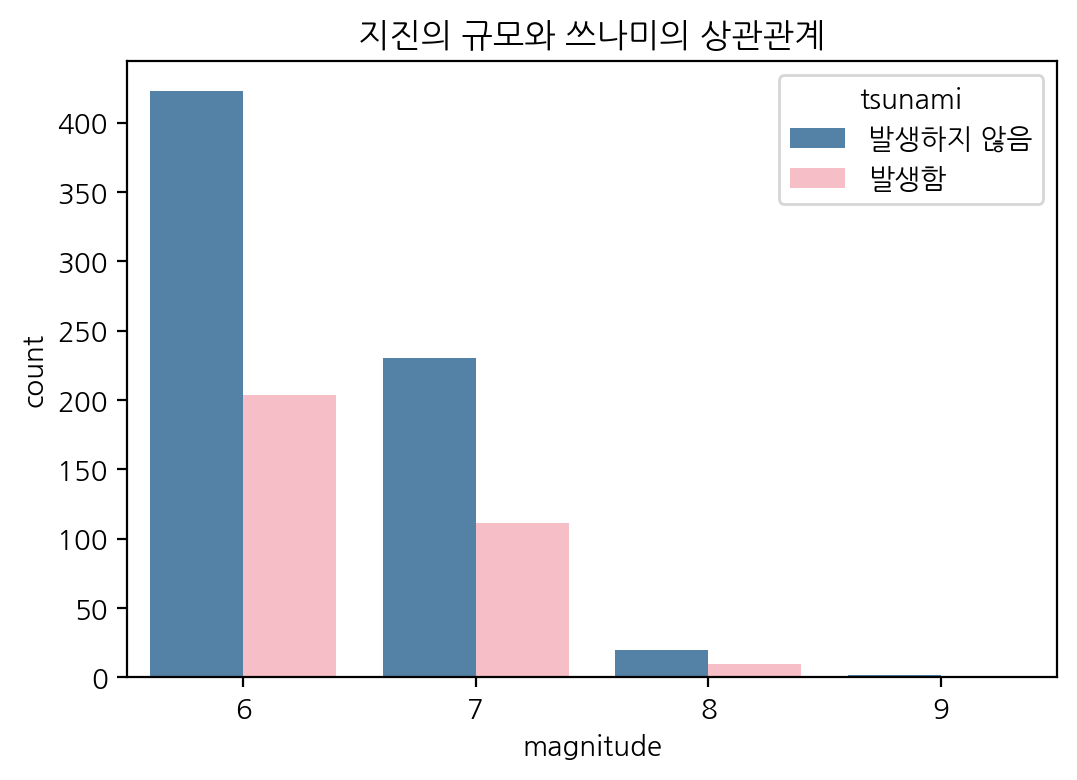

In [93]:
df4['tsunami'] = df4['tsunami'].replace({0: '발생하지 않음', 1: '발생함'})

palette2 = ["#4682B4", "#FFB6C1"]
sns.countplot(data=df4, x='magnitude', hue='tsunami', palette=palette2)
plt.title('지진의 규모와 쓰나미의 상관관계')
plt.show()

In [95]:
df4['tsunami'] = df4['tsunami'].replace({'발생하지 않음': 0, '발생함': 1})
# 다시 0과 1로 되돌림

### 지진의 규모와 쓰나미의 상관관계 시각화

In [97]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
        hover_name=hover_name,
        size=size,
        color_discrete_sequence=cl_disc_seq,
        zoom=zoom, height=height
    )


    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}]
    )

    return fig

### 지진 위치 및 규모 시각화

In [103]:
# 지진 위치 및 규모 시각화
df4['power'] = pow(10, df4['magnitude']) / pow(3, df4['magnitude'])
df4['power'] = df4['power'].round(0)

fig = make_world_fig(df4, 'latitude', 'longitude', 'magnitude', 'power', ["red"], 1.5, 500)
fig.show()

### 쓰나미 위치 및 영향 시각화

In [104]:
# 쓰나미 위치 및 영향 시각화
tsun = df4[df4['tsunami'] == 1]

fig = make_world_fig(tsun, 'latitude', 'longitude', 'magnitude', 'sig', ["#87CEEB"], 1.5, 500)
fig.show()

### 위치 및 규모와 쓰나미의 상관관계 시각화

In [106]:
# 위 그래프 두개를 합쳐 상관관계 시각화
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

def make_world_fig(data1, lat1, lon1, hover_name1, size1, cl_disc_seq1,
                   data2, lat2, lon2, hover_name2, size2, cl_disc_seq2,
                   zoom, height):
    fig = px.scatter_mapbox(data1, lat=lat1, lon=lon1,
        hover_name=hover_name1,
        size=size1,
        color_discrete_sequence=cl_disc_seq1,
        zoom=zoom, height=height
    )

    fig.add_trace(px.scatter_mapbox(data2, lat=lat2, lon=lon2,
        hover_name=hover_name2,
        size=size2,
        color_discrete_sequence=cl_disc_seq2,
        zoom=zoom, height=height
    ).data[0])

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}]
    )

    return fig

df4['power'] = np.power(10, df4['magnitude']) / np.power(3, df4['magnitude'])
df4['power'] = df4['power'].round(0)

tsun = df4[df4['tsunami'] == 1]

fig = make_world_fig(tsun, 'latitude', 'longitude', 'magnitude', 'sig', ["#87CEEB"],
                     df4, 'latitude', 'longitude', 'magnitude', 'power', ["red"],
                     1.5, 500)

fig.show()

## 히트맵으로 나타내기

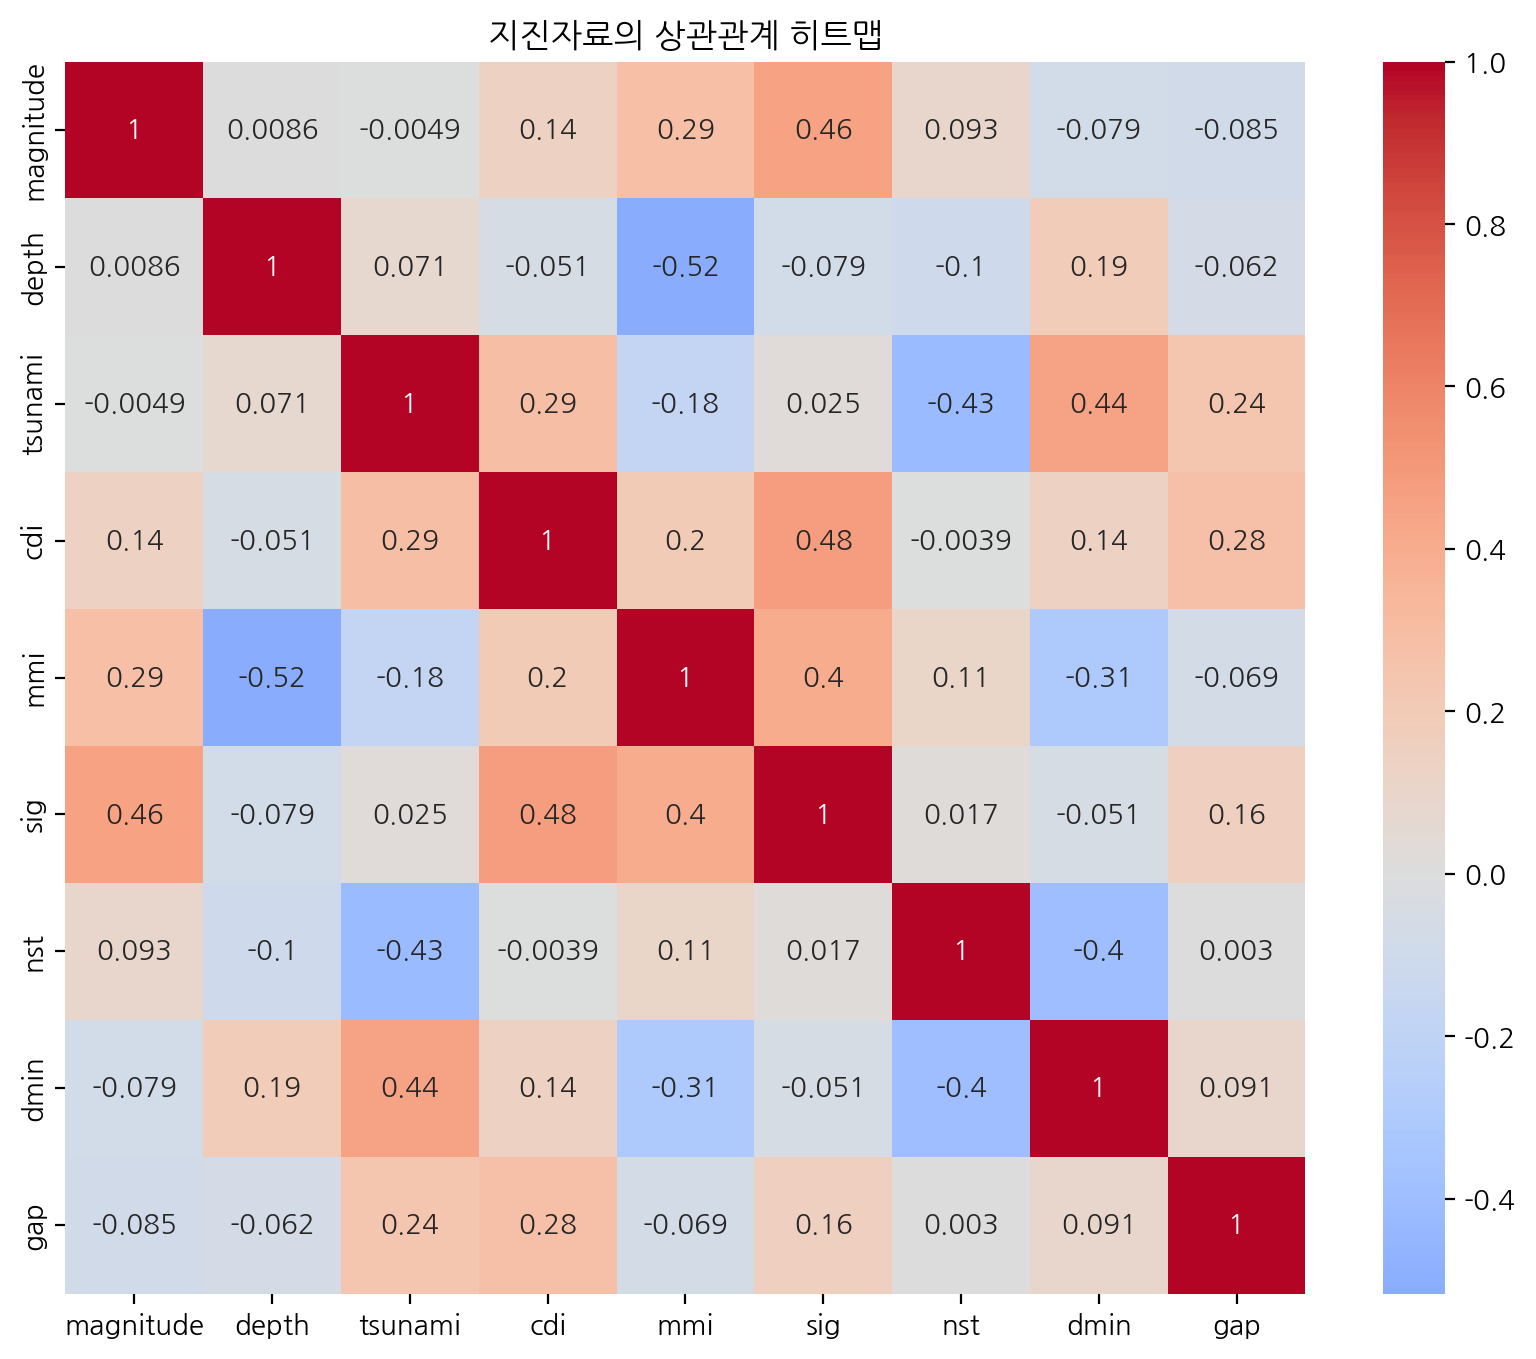

In [114]:
# 필요한 열만 선택하여 새로운 데이터프레임 생성
selected_columns = ['magnitude', 'depth', 'tsunami', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap']
correlation_data = df4[selected_columns].dropna()  # 결측값 제거

# 상관 행렬 계산
correlation_matrix = correlation_data.corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('지진자료의 상관관계 히트맵')
plt.show()